## CNN Tutorial

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [3]:
 #Normalize pixel value from 0 to 255
train_images,test_images=train_images/255.0,test_images/255.0

In [63]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

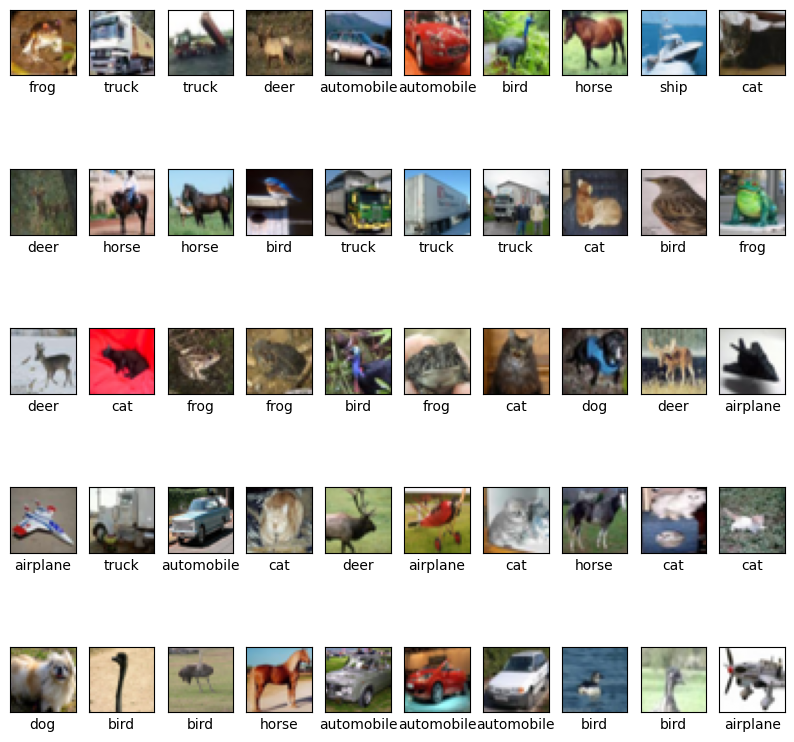

In [5]:
plt.figure(figsize=(10,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
## Creating convolution layer
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history= model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5068 - accuracy: 0.4497 - val_loss: 1.2827 - val_accuracy: 0.5482
Epoch 2/10
1563/1563 [==============================] - 9591s 6s/step - loss: 1.1590 - accuracy: 0.5894 - val_loss: 1.1210 - val_accuracy: 0.5994
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0078 - accuracy: 0.6455 - val_loss: 1.0230 - val_accuracy: 0.6423
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9052 - accuracy: 0.6819 - val_loss: 1.0299 - val_accuracy: 0.6455
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8368 - accuracy: 0.7077 - val_loss: 0.9285 - val_accuracy: 0.6809
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7793 - accuracy: 0.7257 - val_loss: 0.8815 - val_accuracy: 0.6972
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7287 - accuracy: 0.7440 - val_loss: 0.8663 -

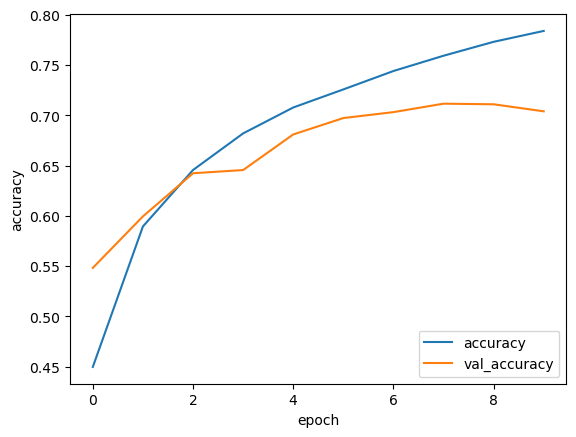

In [11]:
## plotting performance

plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - loss: 0.9121 - accuracy: 0.7039 - 4s/epoch - 11ms/step


In [13]:
print(f"Test Accuracy : {test_acc*100}")

Test Accuracy : 70.38999795913696


In [48]:
test_pred=model.predict(test_images)
test_pred

313/313 [==============================] - 4s 11ms/step


array([[ -3.0021899 ,  -1.7016228 ,  -0.95984036, ...,  -2.4246082 ,
          1.5556073 ,  -2.4680953 ],
       [  6.303445  ,   6.3031893 ,  -4.6638055 , ..., -10.278225  ,
         13.56999   ,   2.2617643 ],
       [  2.942922  ,   0.70418894,  -2.0518763 , ...,  -2.028099  ,
          4.2431564 ,   0.37668172],
       ...,
       [ -6.1736207 ,  -9.791292  ,   2.0135527 , ...,   5.153405  ,
         -5.270063  ,  -6.63263   ],
       [  1.2017012 ,   3.2653182 ,  -3.2510064 , ...,  -3.2795742 ,
         -3.8606002 ,  -4.1982822 ],
       [ -6.716978  , -10.189632  ,   0.41567022, ...,  13.2       ,
        -11.179478  ,  -6.0491843 ]], dtype=float32)

In [60]:
test_prediction=[]
for i in range(0,len(test_pred)):
    d=0
    for j in range(len(test_pred[i])):
        if test_pred[i][j]>d:
            d=j
    test_prediction.append(d)

In [61]:
test_prediction

[3,
 8,
 8,
 8,
 6,
 6,
 3,
 4,
 3,
 6,
 4,
 9,
 4,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 4,
 4,
 4,
 7,
 6,
 6,
 5,
 4,
 5,
 9,
 8,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 8,
 9,
 3,
 7,
 7,
 6,
 7,
 8,
 2,
 3,
 8,
 8,
 7,
 1,
 2,
 4,
 7,
 3,
 4,
 2,
 6,
 6,
 8,
 2,
 5,
 7,
 2,
 6,
 8,
 8,
 1,
 4,
 7,
 3,
 3,
 8,
 8,
 8,
 8,
 7,
 2,
 7,
 4,
 8,
 8,
 8,
 8,
 6,
 8,
 6,
 4,
 6,
 6,
 8,
 2,
 7,
 4,
 5,
 6,
 3,
 8,
 8,
 3,
 6,
 8,
 7,
 4,
 2,
 6,
 2,
 9,
 7,
 4,
 4,
 6,
 5,
 8,
 7,
 9,
 2,
 8,
 8,
 8,
 6,
 3,
 2,
 4,
 5,
 8,
 9,
 9,
 2,
 7,
 7,
 6,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 6,
 5,
 5,
 5,
 8,
 9,
 6,
 9,
 6,
 5,
 2,
 8,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 7,
 8,
 4,
 7,
 4,
 9,
 9,
 8,
 8,
 9,
 9,
 5,
 4,
 5,
 7,
 4,
 5,
 2,
 3,
 3,
 8,
 6,
 3,
 3,
 8,
 2,
 8,
 4,
 9,
 7,
 4,
 8,
 8,
 5,
 8,
 5,
 8,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 8,
 5,
 7,
 6,
 2,
 7,
 9,
 8,
 7,
 7,
 3,
 9,
 3,
 3,
 9,
 4,
 2,
 3,
 2,
 5,
 9,
 5,
 8,
 8,
 2,
 4,
 4,
 3,
 5,
 9,
 9,
 8,
 8,
 4,
 2,
 9,
 8,
 7,
 2,


In [69]:
test_prediction_label=[]
for i in test_prediction:
    test_prediction_label.append(class_names[i])

In [70]:
test_prediction_label

['cat',
 'ship',
 'ship',
 'ship',
 'frog',
 'frog',
 'cat',
 'deer',
 'cat',
 'frog',
 'deer',
 'truck',
 'deer',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'bird',
 'deer',
 'truck',
 'deer',
 'deer',
 'deer',
 'deer',
 'horse',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'ship',
 'horse',
 'truck',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'frog',
 'ship',
 'truck',
 'cat',
 'horse',
 'horse',
 'frog',
 'horse',
 'ship',
 'bird',
 'cat',
 'ship',
 'ship',
 'horse',
 'automobile',
 'bird',
 'deer',
 'horse',
 'cat',
 'deer',
 'bird',
 'frog',
 'frog',
 'ship',
 'bird',
 'dog',
 'horse',
 'bird',
 'frog',
 'ship',
 'ship',
 'automobile',
 'deer',
 'horse',
 'cat',
 'cat',
 'ship',
 'ship',
 'ship',
 'ship',
 'horse',
 'bird',
 'horse',
 'deer',
 'ship',
 'ship',
 'ship',
 'ship',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'ship',
 'bird',
 'horse',
 'deer',
 'dog',
 'frog',
 'cat',
 'ship',
 'ship',
 'cat',
 'frog',
 'ship',
 '

In [30]:
pred_label=  for j in test_prediction

6

In [24]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

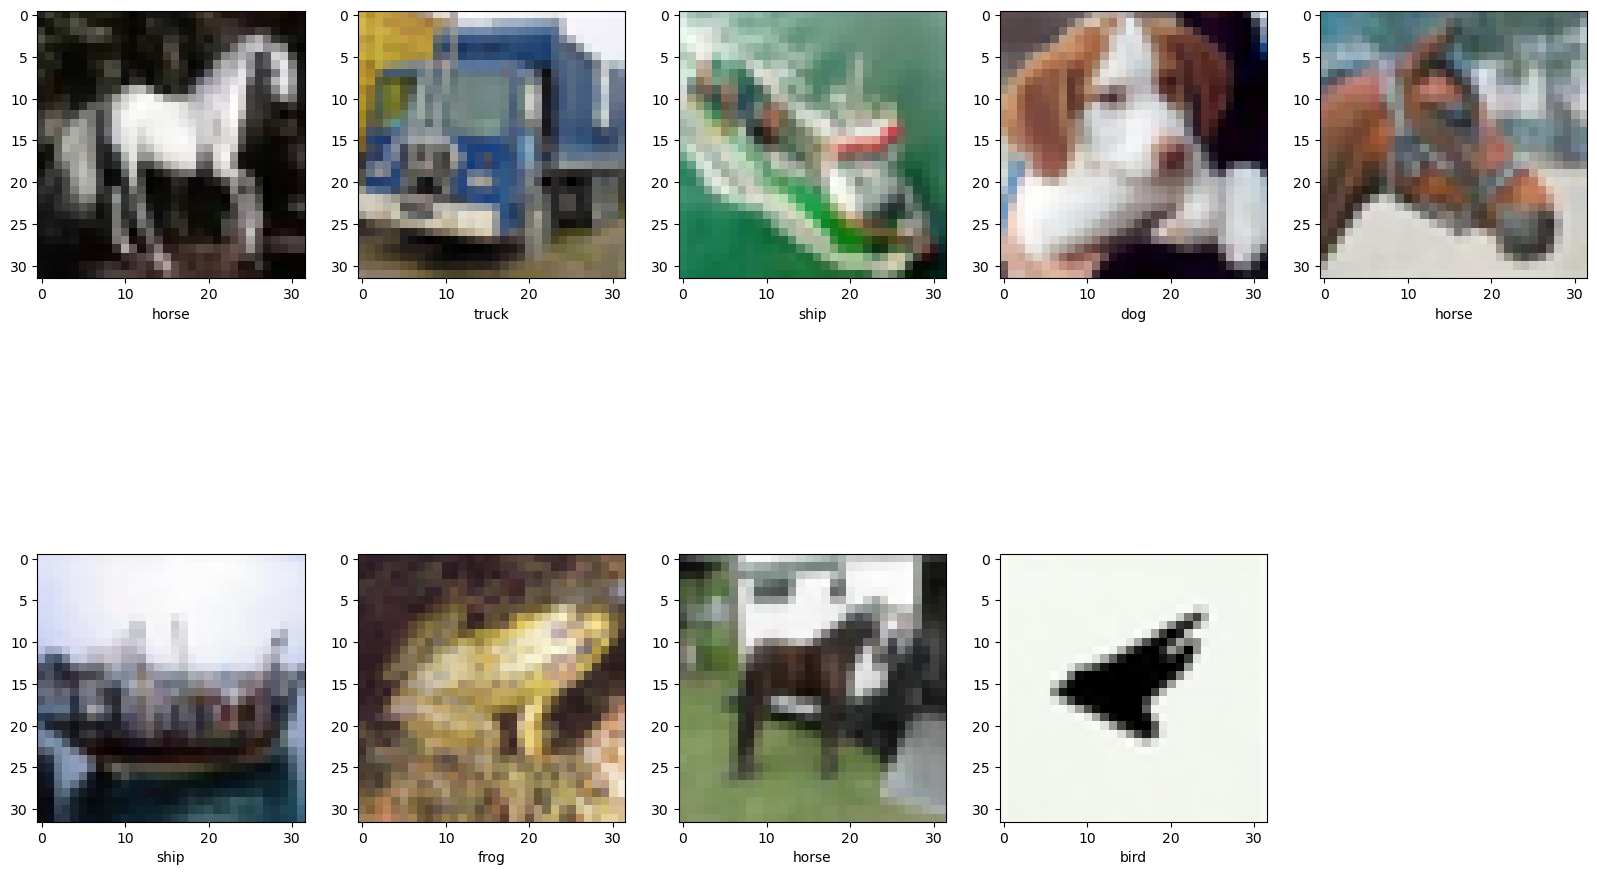

In [89]:
plt.figure(figsize=(20,20))
j=1
for i in range(13,22):
    plt.subplot(3,5,j)
    j=j+1
    plt.imshow(test_images[i])
    plt.xlabel(test_prediction_label[i])
plt.show()

In [ ]:
for i in test_pred:
    label=np.
    